# Fontes (biblioteca e links):

https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_payments_dataset.csv

In [1]:
#!pip install pandas numpy matplotlib seaborn sklearn
# em caso de erro na importação do seaborn use -> %pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime
import scipy
sns.set()

from IPython.display import display
from IPython.display import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
%matplotlib inline

# Estrutura dos dados:

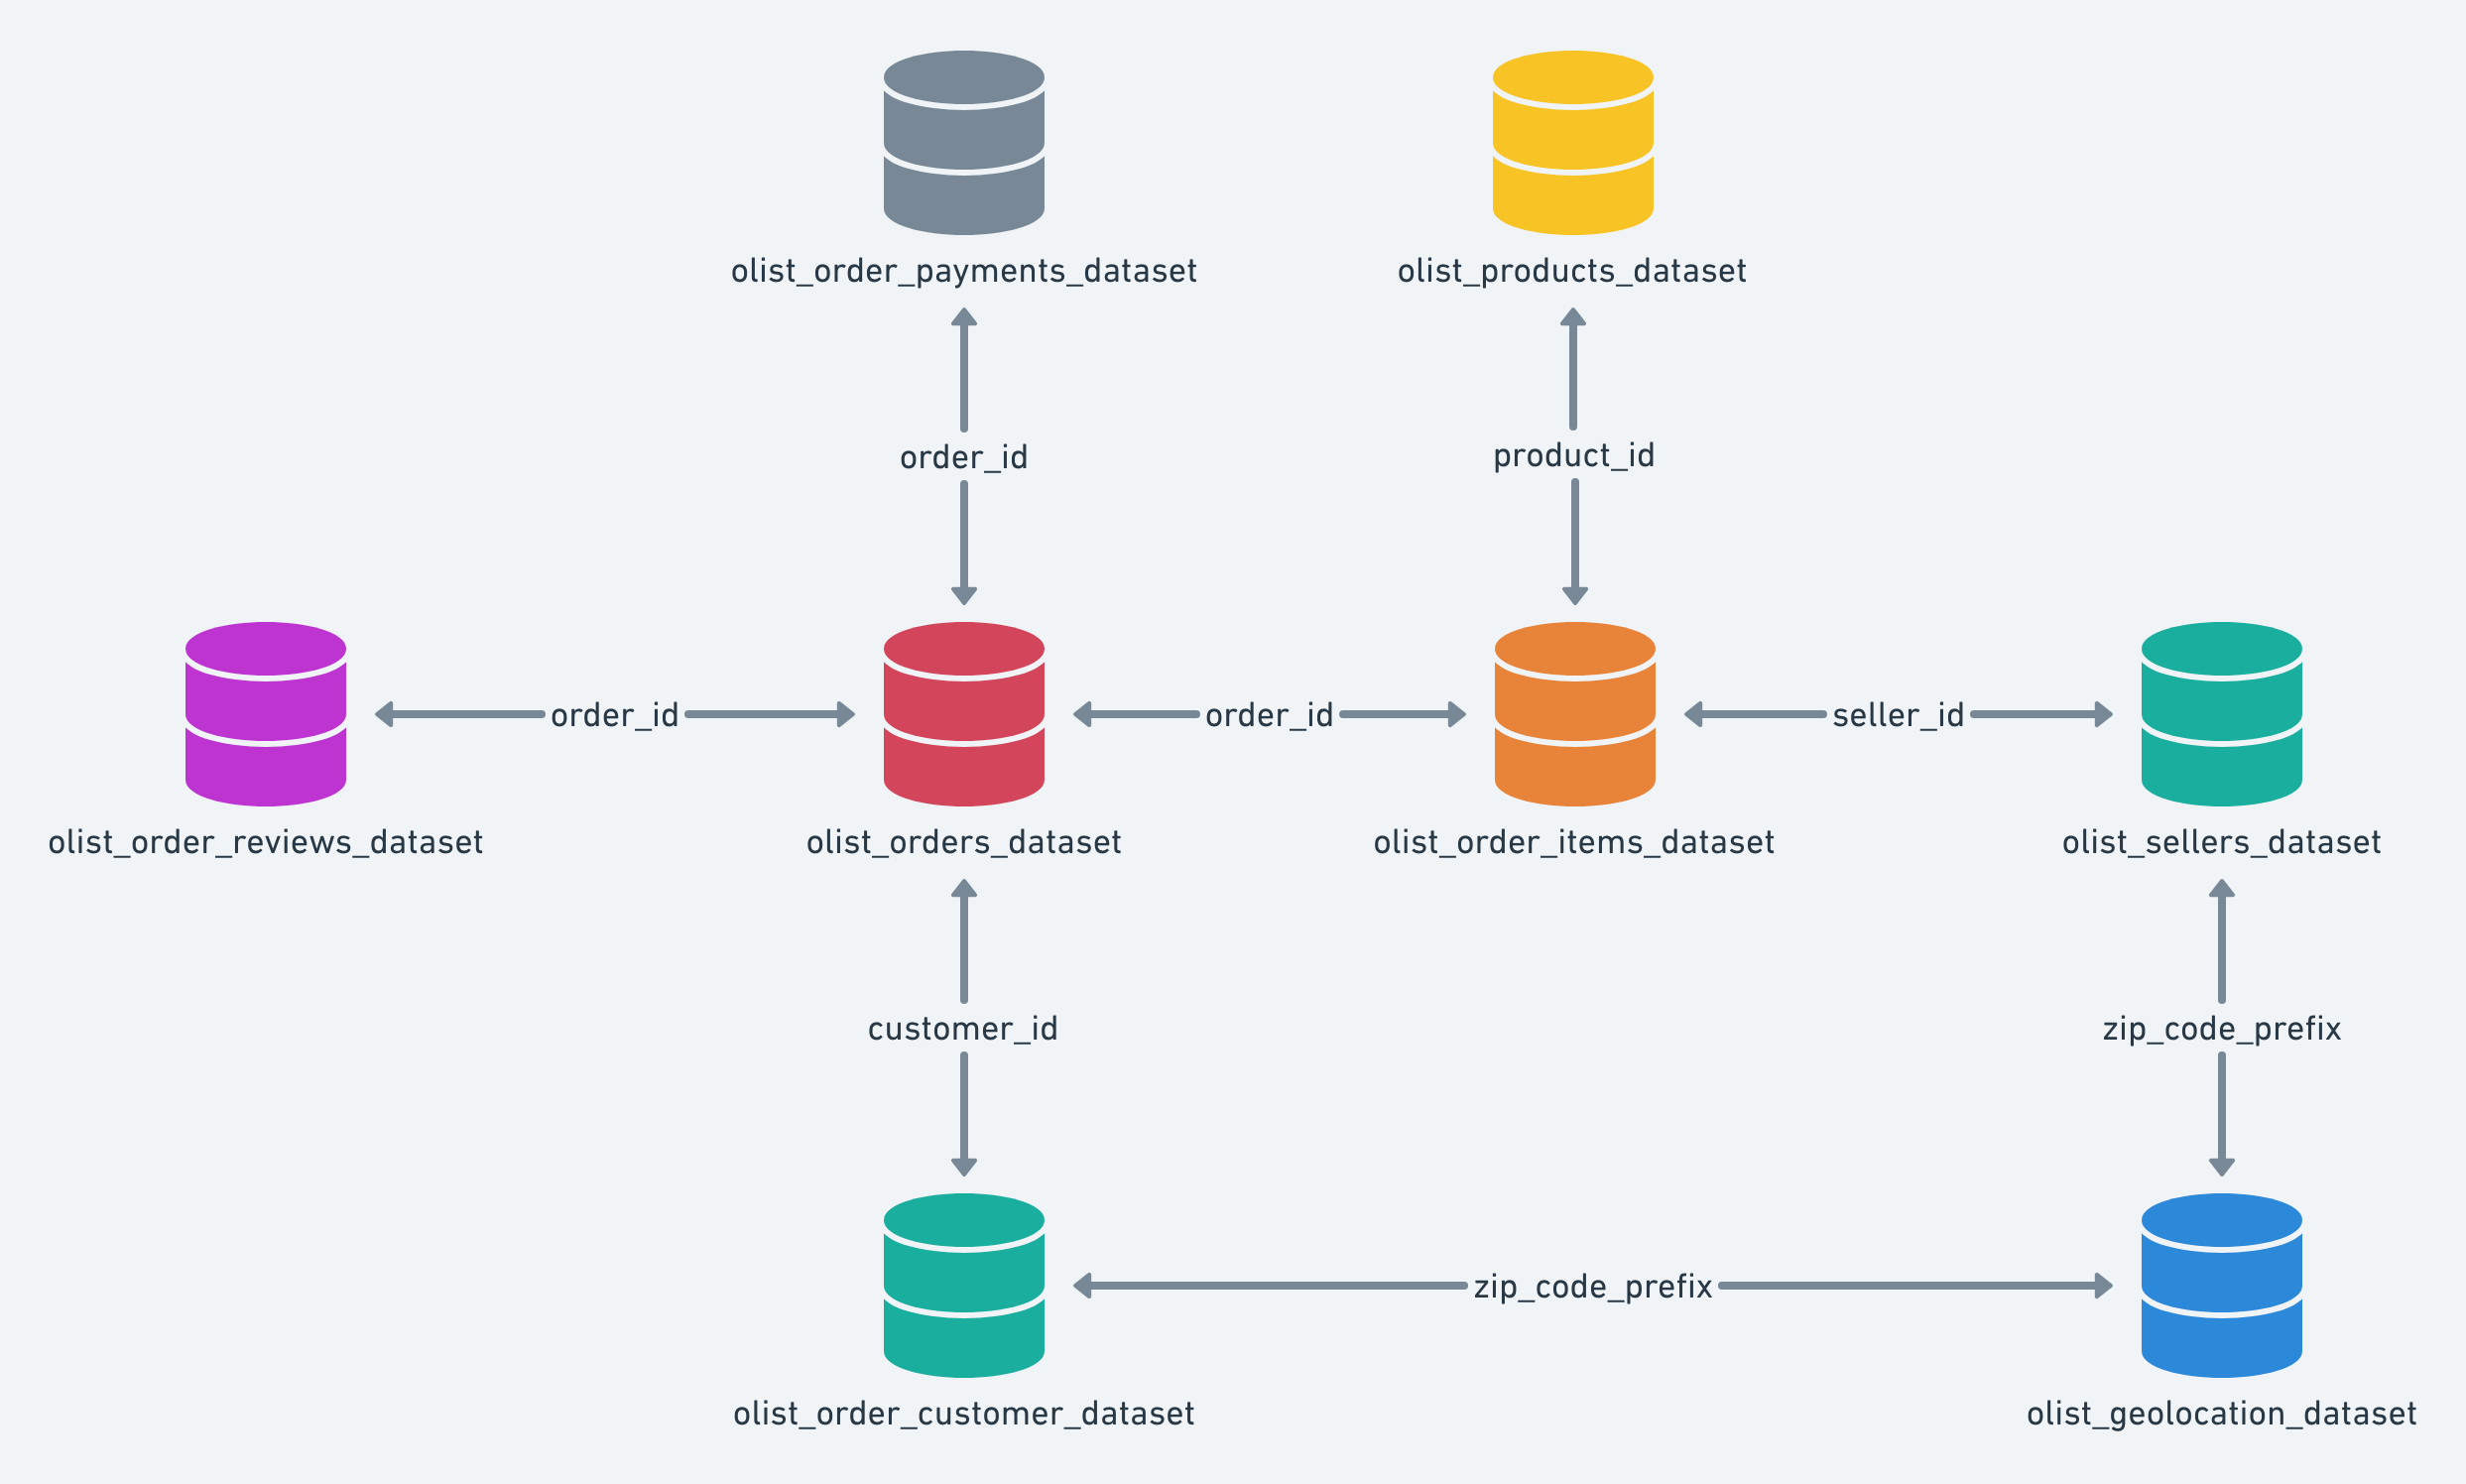

In [3]:
Image('https://i.imgur.com/HRhd2Y0.png', width=700)

## Informações sobre dataset:

#### customer_id:

key to the orders dataset. Each order has a unique customer_id.

#### customer_unique_id:

unique identifier of a customer.

#### customer_zip_code_prefix:

first five digits of customer zip code

#### customer_city:

customer city name

#### order_id:

order unique identifier

#### order_item_id:

sequential number identifying number of items included in the same order.

#### product_id:

product unique identifier

#### seller_id:

seller unique identifier

#### shipping_limit_date:

Shows the seller shipping limit date for handling the order over to the logistic partner.

#### price:

price item

#### freight_value;

freight value item (if an order has more than one item the freight value is splitted between items)

#### payment_sequential:

a customer may pay an order with more than one payment method. If he does so, a sequence will be created to

#### payment_type:

method of payment chosen by the customer.

#### payment_installments:

number of installments chosen by the customer.

#### review_score:

Note ranging from 1 to 5 given by the customer on a satisfaction survey.

#### review_comment_title:

Comment title from the review left by the customer, in Portuguese.

#### review_comment_message:

Comment message from the review left by the customer, in Portuguese.

#### review_creation_date:

Shows the date in which the satisfaction survey was sent to the customer.

#### review_answer_timestamp:

Shows satisfaction survey answer timestamp.

#### customer_id:

key to the customer dataset. Each order has a unique customer_id.

#### order_status:

Reference to the order status (delivered, shipped, etc).

#### order_purchase_timestamp:

Shows the purchase timestamp.

#### order_approved_at:

Shows the payment approval timestamp.

#### order_delivered_carrier_date:

Shows the order posting timestamp. When it was handled to the logistic partner.

#### order_delivered_customer_date:

Shows the actual order delivery date to the customer.

#### order_estimated_delivery_date:

Shows the estimated delivery date that was informed to customer at the purchase moment.

#### product_name_lenght:

number of characters extracted from the product name.

#### product_description_lenght:

number of characters extracted from the product description.

#### product_photos_qty:

number of product published photos

#### product_weight_g:

product weight measured in grams.

#### product_length_cm:

product length measured in centimeters.

#### product_height_cm:

product height measured in centimeters.

#### product_width_cm:

product width measured in centimeters.

### Atenção:

1. Um pedido pode ter vários itens.
2. Cada item pode ser entregue por um vendedor distinto.

### Anotações:

1.
A Olist é uma loja de departamentos (marketplace) brasileira que atua no segmento de e-commerce, mas não é um e-commerce em si. Atua como uma empresa de tecnologia SaaS (Software as a Service) desde 2015. Oferece uma solução de marketplace (do segmento de e-commerce) para lojistas de todos os portes (e para a maioria dos segmentos) para aumentar suas vendas com presença online ou não .

2.
A solução da Olist consiste em três aspectos: Software, Contratos com os principais marketplaces e Compartilhamento de Reputação. O diagrama abaixo mostra como a Olist vincula marketplaces, consumidores e varejistas

3.
Lista:
- … é uma grande loja de departamentos dentro de marketplaces.
- … está conectado aos principais e-commerces do Brasil.
- … não compra produtos.
- … não mantém produtos em estoque.
- … não realiza o envio de nenhum produto oferecido em sua loja.
- Todos os produtos são vendidos e enviados pelos milhares de lojistas (cadastrados na Olist*) que vendem através da Olist.
- Sua força está na união de todos os lojistas participantes, que estão vendendo produtos físicos.
- O lojista participante é responsável por separar, embalar e levar os produtos até o operador logístico.

## Desafio:
- Modelo de machine learning que agrupe clientes como: ouro, prata e bronze
- Features usadas: receita média, quantidade de pedidos, retenção, recência

## Passo-a-passo:

Para conseguirmos variáveis relevantes para elaborar nosso modelo primeiro devemos tratar nossos dados para que obtenhamos uma estrutura organizada e o menos defeituosa possível para extrair as informações que precisamos. Iniciaremos este processo com as seguintes estapas:
- Reunir os dados brutos através das chaves que os conectam ("primary keys" e "foreign keys" como no contexto de banco de dados).
- Tratar os tipos de dados incorretos
- Tratar os dados nulos
- Fazer a seleção ou "criação" das variáveis necessárias através do feature selection
- Criação do modelo a partir dessa reestruturação dos dados, formulando assim nossa variável explicada e nossas variáveis explicativas 

# Observando estrutura dos arquivos:

In [4]:
import pathlib
x = tuple(pathlib.Path('.').rglob('olistcsv/*.csv'))
for i, each in enumerate(x): 
    print(i, each, sep='\n')
    v = pd.read_csv(x[i])
    print(tuple(v.columns))
    print(f'{v.shape[0]} lines', f'{v.shape[1]} columns\n')

0
olistcsv/olist_order_items_dataset.csv
('order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value')
112650 lines 7 columns

1
olistcsv/olist_geolocation_dataset.csv
('geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state')
1000163 lines 5 columns

2
olistcsv/olist_order_payments_dataset.csv
('order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value')
103886 lines 5 columns

3
olistcsv/olist_sellers_dataset.csv
('seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state')
3095 lines 4 columns

4
olistcsv/product_category_name_translation.csv
('product_category_name', 'product_category_name_english')
71 lines 2 columns

5
olistcsv/olist_customers_dataset.csv
('customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state')
99441 lines 5 columns

6
olistcsv/olist_orders_dataset.csv
('order_id', 'customer_id', 'order_

# Raw datasets (extração bruta):

### Anotações sobre os arquivos e colunas importantes:
**olistcsv/olist_order_items_dataset.csv ->**
o preço do produto é preço + frete
order_id, product_id

**olistcsv/olist_order_payments_dataset.csv ->**
order_id, payment_sequential, payment_type, payment_installments, payment_value

**olistcsv/olist_customers_dataset.csv -> informações sobre o cliente**
customer_id, customer_unique_id

**olistcsv/olist_order_reviews_dataset.csv ->**
order_id, review_id, review_score, review_comment_message

**time notes ->**
considerar compra por tempo, quantidade, compra média no tempo, primeira e última compra

### Lendo dados brutos:

In [5]:
# ADICIONAR ETAPA DO MinIO
path = '/home/ricardo/Documentos/git/SVMSquad/ProjSquadStack/olistcsv/'
raw_price_freight = pd.read_csv(path + 'olist_order_items_dataset.csv')
raw_payment = pd.read_csv(path + 'olist_order_payments_dataset.csv')
raw_client_review = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
raw_orders_central = pd.read_csv(path + 'olist_orders_dataset.csv')
raw_costumer = pd.read_csv(path + 'olist_customers_dataset.csv')

### Unindos as tabelas e descrevendo "shape" e colunas:

raw_orders_central # Tabela dimensão -> 'order_id', 'customer_id'

raw_costumer # Tabela dimensão -> 'customer_id', 'customer_unique_id'


raw_price_freight # Tabela fato

raw_payment # Tabela fato

raw_client_review # Tabela fato

In [6]:
# Formação de tabelas e seus vínculos explicativos

df1 = pd.merge(left=raw_orders_central, right=raw_costumer, on='customer_id', how='outer')
price_freight = pd.merge(left=raw_price_freight, right=df1, on='order_id', how='left')
payment = pd.merge(left=raw_payment, right=df1, on='order_id', how='left')
client_review = pd.merge(left=raw_client_review, right=df1, on='order_id', how='left')

In [7]:
del raw_client_review, raw_costumer, raw_orders_central, raw_payment, raw_price_freight

## Uma investigação sobre a organização dos dados:

Queremos entender se **payment_value** representa a soma da coluna **price** e da coluna **freight_value**

1. Primeiramente usaremos os clientes com maior diversidade em seus pedidos:

In [8]:
display(price_freight[['customer_id', 'order_id']].value_counts().head(2))
display(price_freight[['customer_id', 'order_id']].value_counts().tail(1))

display(payment[['customer_id', 'order_id']].value_counts().head(2))
display(payment[['customer_id', 'order_id']].value_counts().tail(2))

customer_id                       order_id                        
fc3d1daec319d62d49bfb5e1f83123e9  8272b63d03f5f79c56e9e4120aec44ef    21
be1b70680b9f9694d8c70f41fa3dc92b  1b15974a0141d54e36626dca3fdc731a    20
dtype: int64

customer_id                       order_id                        
800512d0215633d567abe5ce2591f01d  971602526032659f775bbbe5b9142179    1
dtype: int64

customer_id                       order_id                        
9af2372a1e49340278e7c1ef8d749f34  fa65dad1b0e818e3ccc5cb0e39231352    29
92cd3ec6e2d643d4ebd0e3d6238f69e2  ccf804e764ed5650cd8759557269dc13    26
dtype: int64

customer_id                       order_id                        
56f10439f7b396c7c7b5445357c22e9b  4f601391cdfe2a3984a4b1680c2c3d9a    1
ffffe8b65bbe3087b653a978c870db99  2e935fa1d39497aa0ec3f1107fbfb5b8    1
dtype: int64

->

2. Agora usaremos eles como nossas variáveis de comparação:

**8272b63d03f5f79c56e9e4120aec44ef**, 

**1b15974a0141d54e36626dca3fdc731a**, 

**fa65dad1b0e818e3ccc5cb0e39231352**, 

**ccf804e764ed5650cd8759557269dc13**, 

**971602526032659f775bbbe5b9142179**,

**4f601391cdfe2a3984a4b1680c2c3d9a**

In [9]:
def comparar_pedidos(df1, df2, cod_pedido):
    d1 = df1[df1['order_id'] == cod_pedido]
    d2 = df2[df2['order_id'] == cod_pedido]
    d1.columns = d2.columns = ['order_id', 'result']
    print(f'{d1["result"].to_numpy()[0]} == {d1["result"].to_numpy()[0]}')

In [10]:
newdf = price_freight.copy()
newdf['result'] = price_freight.price + price_freight.freight_value

test1 = payment.groupby('order_id', as_index=False).sum()[['order_id', 'payment_value']]
test2 = newdf.groupby('order_id', as_index=False).sum()[['order_id', 'result']]

lista = '8272b63d03f5f79c56e9e4120aec44ef, 1b15974a0141d54e36626dca3fdc731a, fa65dad1b0e818e3ccc5cb0e39231352, ccf804e764ed5650cd8759557269dc13, 971602526032659f775bbbe5b9142179, 4f601391cdfe2a3984a4b1680c2c3d9a'.split(', ')
awnser = np.arange(len(lista))

for order in lista:
    comparar_pedidos(test1, test2, order)

196.11 == 196.11
2202.4 == 2202.4
457.99 == 457.99
62.68 == 62.68
251.64 == 251.64
174.11 == 174.11


Nossa investigação demonstrou que a soma da coluna "price" e "freight_value" agrupada pela colunar "Order_id" é a forma correta de se compreender a coluna "payment_value". Usamos esta investigação para podermos explicitar a igualdade entre as colunas que existem em diferentes tabelas (A tabela price_freight e a payment)

In [11]:
del newdf, test1, test2, lista, awnser

# Tratando os tipos de dados:

## PERGUNTA: TRATAR TODAS AS TABELAS?

In [12]:
def transform(df: pd.DataFrame, colunas: list) -> pd.DataFrame:
    for each in colunas:
        df[each] = pd.to_datetime(df[each], errors='coerce')
    df['customer_zip_code_prefix'].astype('object')

In [13]:
# Tabela client_review
colunas = ('review_creation_date review_answer_timestamp order_purchase_timestamp order_approved_at ' +
'order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date').split()

transform(client_review, colunas)


# Tabela payment 
colunas = ('order_purchase_timestamp order_approved_at order_delivered_carrier_date'
          + ' order_delivered_customer_date order_estimated_delivery_date').split()

transform(payment, colunas)


# Tabela price_freight
colunas = ('shipping_limit_date order_purchase_timestamp order_approved_at order_delivered_carrier_date'
          + ' order_delivered_customer_date order_estimated_delivery_date').split()

transform(price_freight, colunas)

In [14]:
del colunas

# Análise dos dados nulos

In [15]:
price_freight.name = 'price_freight'
payment.name = 'payment'
client_review.name = 'client_review'

In [16]:
dados = [price_freight, payment, client_review]

for v in dados:
    print(f'Tabela {v.name.capitalize()}:')
    display(v.isna().sum()[v.isna().sum() > 0])
    print('-'*20, '\n')

Tabela Price_freight:


order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
dtype: int64

-------------------- 

Tabela Payment:


order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
dtype: int64

-------------------- 

Tabela Client_review:


review_comment_title             87656
review_comment_message           58247
order_approved_at                  156
order_delivered_carrier_date      1756
order_delivered_customer_date     2865
dtype: int64

-------------------- 



Considerando que o modelo que será criado agrupara os clientes baseados nas variáveis **receita média**, **quantidade de pedidos**, **retenção** e **recência**, os valores nulos descritos por tabela e por coluna acima não afetam os resultados

# Investigando distribuição e composição dos dados:

In [17]:
num_att1 = price_freight.select_dtypes(include=['int', 'float']).drop(columns=['order_item_id', 'customer_zip_code_prefix'])
num_att2 = payment['payment_value']
num_att3 = client_review['review_score']


p1 = pd.concat([pd.Series(price_freight.price.skew()), pd.Series(price_freight.freight_value.skew())], axis=0, ignore_index=True)
p2 = pd.concat([pd.Series(price_freight.price.kurt()), pd.Series(price_freight.freight_value.kurt())], axis=0, ignore_index=True)
p2.index = p1.index = ['freight_value', 'price']

p = pd.concat([num_att1.describe().T, p1.T, p2.T], axis=1, ignore_index=True)
p.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis']
p

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00,5.639870,59.788253
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68,7.923208,120.828298


Podemos perceber que ambas as distribuições são significativamente dispersas através dos valores do terceiro quartil (coluna "75%") e do valor máximo (coluna "max"). O frete, apesar de ter uma composição muito menos dispersa, possui o mesmo comportamento que o preço em relação ao demonstrado do terceiro ao último quartil.

Observemos agora sua distribuição em um gráfico para observar como se comporta a quantidade de dados em sua estrutura.

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='price', ylabel='Density'>

<AxesSubplot:xlabel='price', ylabel='Density'>

Text(6735.0, 0.002, 'Maior valor da coluna "price"')

Text(13664.08, 0.003, 'Maior valor da coluna "payment.payment_value"')

Text(409.68, 0.004, 'Maior valor da coluna "freight_value"')

<AxesSubplot:>

<AxesSubplot:xlabel='freight_value', ylabel='Density'>

Text(409.68, 0.02, 'Maior valor da coluna "freight_value"')

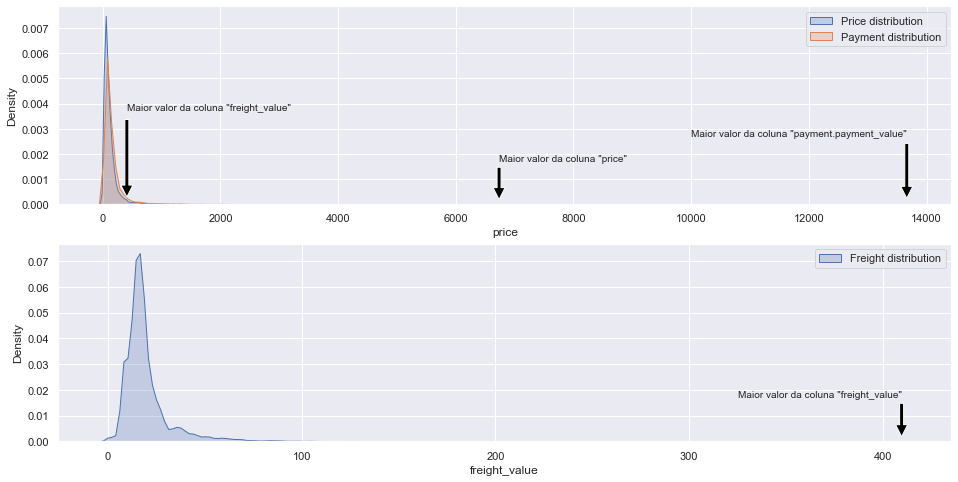

In [18]:
# Tabela Price_freight: ver distribuição do price, freight_value, order_purchase_timestamp (max, min e dist.)
# Tabela Payment: ver distribuição do payment_sequential, payment_type
# Tabela Client_review: ver distribuição do review_score, 

plt.figure(figsize=(16,8))

plt.subplot(2, 1, 1)
sns.kdeplot(price_freight.price, label='Price distribution', shade=True)
sns.kdeplot(payment.payment_value, label='Payment distribution', shade=True)
plt.annotate(
    'Maior valor da coluna "price"',
    (price_freight.price.max(), 0.0001),
    arrowprops=dict(facecolor='black', shrink=0.05),
    xytext=(price_freight.price.max(), 0.002),
    horizontalalignment='left',
    verticalalignment='top'
    )
plt.annotate(
    'Maior valor da coluna "payment.payment_value"',
    (payment.payment_value.max(), 0.0001),
    arrowprops=dict(facecolor='black', shrink=0.05),
    xytext=(payment.payment_value.max(), 0.003),
    horizontalalignment='right',
    verticalalignment='top'
    )
plt.annotate(
    'Maior valor da coluna "freight_value"',
    (price_freight.freight_value.max(), 0.0001),
    arrowprops=dict(facecolor='black', shrink=0.05),
    xytext=(price_freight.freight_value.max(), 0.004),
    horizontalalignment='left',
    verticalalignment='top'
    )
plt.legend(loc='best')

plt.subplot(2, 1, 2)
sns.kdeplot(price_freight.freight_value, label='Freight distribution', shade=True)
plt.annotate(
    'Maior valor da coluna "freight_value"',
    (price_freight.freight_value.max(), 0.001),
    arrowprops=dict(facecolor='black', shrink=0.05),
    xytext=(price_freight.freight_value.max(), 0.02),
    horizontalalignment='right',
    verticalalignment='top'
    )
plt.legend(loc='best')

plt.show()

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='price'>

<AxesSubplot:>

<AxesSubplot:xlabel='freight_value'>

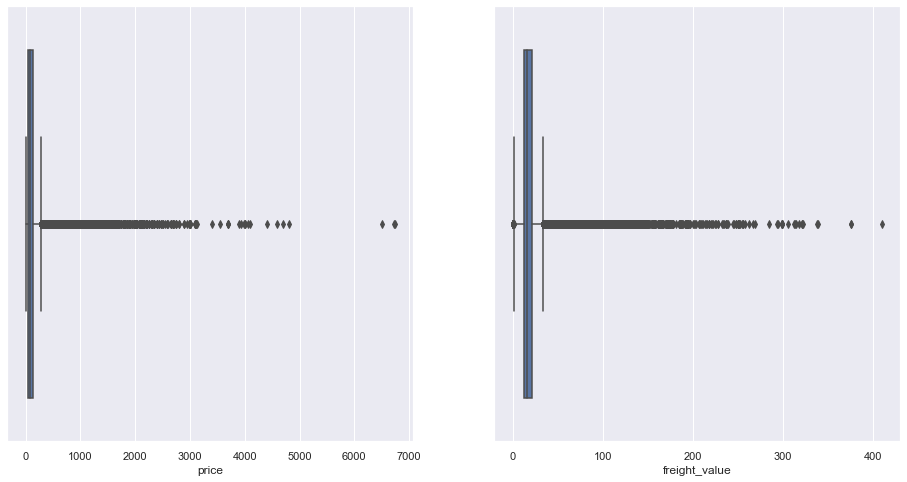

In [19]:
# Plotar boxplot
plt.figure(figsize=(16,8))

for i, cl in enumerate(['price', 'freight_value']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=price_freight[cl])

Torna-se possível, agora, perceber visualmente a capacidade de influência dos outliers sobre a estrutura. É importante notar onde está localizada a maior parte dos dados, se nos valores dispersos ou se nos valores concentrados para considerações finais

In [20]:
# Encontrar a contagem (unidades) de cada diferente preço e depois soma-los
p1 = price_freight.price.value_counts()[price_freight.price.value_counts() < 100].sum()
p2 = price_freight.price.value_counts()[price_freight.price.value_counts() > 100].sum()
ptotal = p1 + p2

print(f'Valores abaixo de 100: {p1} unidades', end=' --- ')
print(f'Porcentagem de {p1/ptotal:.2%}')
print()
print(f'Valores acima de 100: {p2} unidades', end=' --- ')
print(f'Porcentagem de {p2/ptotal:.2%}')

Valores abaixo de 100: 39400 unidades --- Porcentagem de 35.04%

Valores acima de 100: 73050 unidades --- Porcentagem de 64.96%


Portanto, a conclusão que podemos tirar desses dados é que os outliers não são somente dados extraordinários que podemos considerar retira-los pois sua predominancia é consideravelmente maior que os dados menos dispersos (em torno da mediana)

In [21]:
del p1, p2, ptotal

# Extraindo as colunas (features) para o modelo:

Antes de tudo devemos definir o que queremos e o que cada um desses objetivos significa:
receita média, quantidade de pedidos, retenção, recência
1. **Quantidade de pedidos**: quantidade de pedidos realizados por cliente.
2. **Retenção**: Período de compras do cliente, o tempo inicial sobre tempo final de suas compras realizadas.
3. **Recência**: Diferença entre a data da última compra e a data de hoje.
4. **Receita média**: receita gerada por cliente sobre a quantidade de pedidos realizados (receita média gerada pelo cliente) ou sobre o período que ele comprou (receita média gerada por cliente sobre tempo).

### 1. Quantidade de pedidos:

Os dados abaixo descrevem a quantidade de compras feitas por cliente e a quantidade de itens por cliente

In [22]:
Cliente = dados[0][['customer_unique_id', 'order_id']].groupby(['customer_unique_id']).agg(['nunique','count']).sort_values([('order_id', 'count'), ('order_id', 'nunique')], ascending=False)
Cliente

order_id      
                                  nunique count
customer_unique_id                             
c8460e4251689ba205045f3ea17884a1        4    24
4546caea018ad8c692964e3382debd19        1    21
698e1cf81d01a3d389d96145f7fa6df8        1    20
c402f431464c72e27330a67f7b94d4fb        1    20
0f5ac8d5c31de21d2f25e24be15bbffb        2    18
...                                   ...   ...
fffcc512b7dfecaffd80f13614af1d16        1     1
fffea47cd6d3cc0a88bd621562a9d061        1     1
ffff371b4d645b6ecea244b27531430a        1     1
ffff5962728ec6157033ef9805bacc48        1     1
ffffd2657e2aad2907e67c3e9daecbeb        1     1

[95420 rows x 2 columns]

A partir da tabela encontrada extrairemos os dados da contagem de pedidos realizados por cliente (order_id + nunique)

In [23]:
Cliente = Cliente['order_id']['nunique'].sort_values(ascending=False)
Cliente

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    16
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
42c96a490485d6559935a102ede6b1c2     1
42c933d49eb9dfdf9db525156e9aa506     1
42c8ccbe558d063718d19cff01505af9     1
42c837a3d7df8cfa87de63fbc1aade2f     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: nunique, Length: 95420, dtype: int64

### Etapa intermediária:

Visando encontrar a retenção e a recência iremos trabalhar com a variável tempo, analisando seu comportamento e anexado a tabela principal que usaremos para o modelo. Usaremos a coluna "order_purchase_timestamp" para tal análise

In [24]:
p2 = dados[0][['customer_unique_id', 'order_purchase_timestamp']].groupby(['customer_unique_id'], as_index=False).agg(['max', 'min'])['order_purchase_timestamp']
p2['time'] = p2['max'] - p2['min']
p2 = p2.reset_index()

substituiremos os valores que possuem "0 dias" de compra por "1 dia" de compra pois a diferença entre tempo máximo e mínimo das compras dos clientes que compraram somente uma vez gerou essa incoerência lógica.

In [25]:
p2.time[p2.time < timedelta(days=1)] = timedelta(days=1)

/tmp/ipykernel_8605/3648004967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2.time[p2.time < timedelta(days=1)] = timedelta(days=1)


In [26]:
p2.sort_values('time', ascending=False)

,customer_unique_id,max,min,time
19031,32ea3bdedab835c3aa6cb68ce66565ef,2018-06-28 11:46:04,2016-10-03 09:44:50,633 days 02:01:14
76403,ccafc1c3f270410521c3c6f3b249870f,2018-06-07 19:03:12,2016-10-06 19:33:34,608 days 23:29:38
80964,d8f3c4f441a9b59a29f977df16724f38,2018-08-24 17:52:59,2017-01-18 21:08:18,582 days 20:44:41
55465,94e5ea5a8c1bf546db2739673060c43f,2018-05-09 13:49:19,2016-10-05 21:10:56,580 days 16:38:23
50627,87b3f231705783eb2217e25851c0a45d,2018-05-04 11:14:37,2016-10-08 18:45:34,572 days 16:29:03
...,...,...,...,...
32158,560f0209de88107bec357f67dade4362,2018-05-16 09:20:00,2018-05-16 09:20:00,1 days 00:00:00
32157,560a6e0ef8a24a50cd83690e297827ca,2017-05-02 21:33:57,2017-05-02 21:33:57,1 days 00:00:00
32156,560a6282f0b9f4176cb56ff6024632d8,2018-08-01 15:25:31,2018-08-01 15:25:31,1 days 00:00:00
32155,560a4662eb4a058fa759def32ff39feb,2018-04-01 20:56:06,2018-04-01 20:56:06,1 days 00:00:00


### 2. Retenção:

Podemos ver a distribuição dos dados que demonstram a quantidade de clientes e seus respectivos tempos como clientes.

Text(0.5, 0.98, 'Distribuição do tempo de retenção dos clientes')

<AxesSubplot:>

<AxesSubplot:xlabel='time', ylabel='Density'>

<AxesSubplot:xlabel='time', ylabel='Density'>

Text(101, 0.02, 'Dados mais frequentes entre clientes\ncom mais de um dia de compra')

Text(100, 0.13, 'Dados mais frequentes são os de um dia de compra')

Text(0.5, 0, 'Distribuição de clientes por tempo de retenção')

<AxesSubplot:>

<AxesSubplot:xlabel='time', ylabel='Density'>

Text(0.5, 0, 'Distribuição de clientes por tempo de retenção\ndesconsiderando os menores que 1 dia')

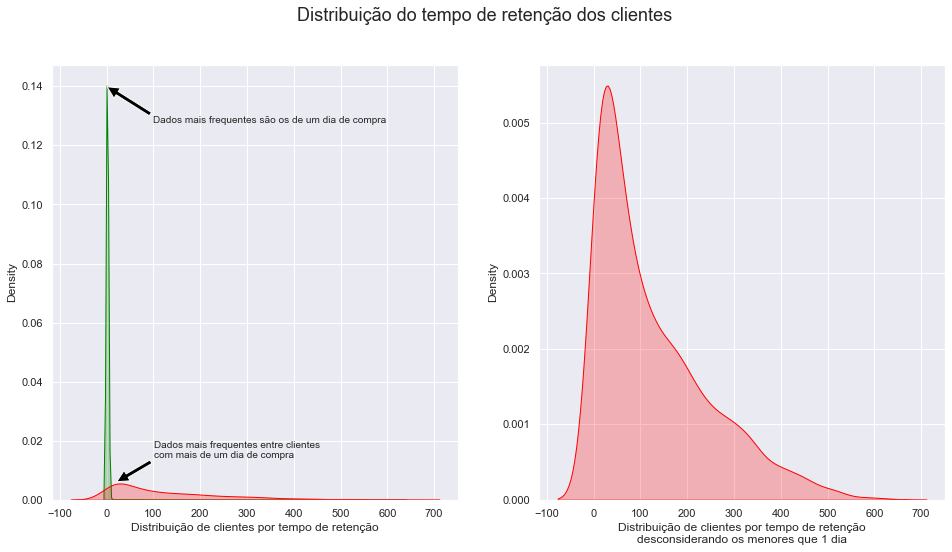

In [27]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Distribuição do tempo de retenção dos clientes', fontsize=18)

top = p2.time.dt.days.value_counts().nlargest(1).index[0]

plt.subplot(1, 2, 1,)
sns.kdeplot(p2.time.dt.days, palette=sns.palettes.light_palette, shade=True, color='Green')
sns.kdeplot(p2.time[p2.time > timedelta(days=2)].dt.days, shade=True, color='Red')
plt.annotate(
    'Dados mais frequentes entre clientes\ncom mais de um dia de compra',
    (top+20, 0.006),
    arrowprops=dict(facecolor='black', shrink=0.01),
    xytext=(top+100, 0.02),
    horizontalalignment='left',
    verticalalignment='top'
)
plt.annotate(
    'Dados mais frequentes são os de um dia de compra',
    (0, 0.14),
    arrowprops=dict(facecolor='black', shrink=0.01),
    xytext=(100, 0.13),
    horizontalalignment='left',
    verticalalignment='top'
)
plt.xlabel('Distribuição de clientes por tempo de retenção')

plt.subplot(1, 2, 2)
sns.kdeplot(p2.time[p2.time > timedelta(days=2)].dt.days, shade=True, color='Red')
plt.xlabel('Distribuição de clientes por tempo de retenção\ndesconsiderando os menores que 1 dia')
plt.show()

In [28]:
dist = p2.time.dt.days.sort_values(ascending=False)
dist = pd.Series(np.where(dist == 1, dist.astype(str) + ' dia', dist.astype(str) + ' dias'))
((dist.value_counts().nlargest(4) / dist.value_counts().sum()).round(6) * 100).astype(str) + '%'

1 dia     97.8809%
6 dias     0.0314%
2 dias     0.0314%
3 dias     0.0272%
dtype: object

A visualização de dados acima nos permite enxergar com clareza como a quantidade de compras é feita em somente uma data específica, ou seja, baixa retenção dos clientes

Agora que compreendemos a composição dos dados que serão inseridos na nossa tabela X (variável explicativa), podemos prosseguir com esta união

In [29]:
Cliente = pd.merge(left=Cliente, right=p2[['customer_unique_id', 'time']], how='outer', on='customer_unique_id').sort_values('time', ascending=False)

### 3. Recência:

Usaremos a coluna "max" para, através da data da última compra, realizarmos a comparação com a data de hoje visando encontrar o tempo de ausência desde a última compra

In [30]:
p2['recencia'] = np.array([datetime.today() for _ in range(p2['max'].shape[0])], dtype=np.datetime64) - p2['max']
Cliente = pd.merge(left=Cliente, right=p2[['customer_unique_id', 'recencia']], how='outer', on='customer_unique_id').sort_values('time', ascending=False)

In [31]:
Cliente.columns = 'cliente quantia_comprada retencao recencia'.split()

In [32]:
Cliente

,cliente,quantia_comprada,retencao,recencia
0,32ea3bdedab835c3aa6cb68ce66565ef,3,633 days 02:01:14,1310 days 23:39:02.916180
1,ccafc1c3f270410521c3c6f3b249870f,2,608 days 23:29:38,1331 days 16:21:55.001287
2,d8f3c4f441a9b59a29f977df16724f38,2,582 days 20:44:41,1253 days 17:32:08.006031
3,94e5ea5a8c1bf546db2739673060c43f,2,580 days 16:38:23,1360 days 21:35:47.977706
4,87b3f231705783eb2217e25851c0a45d,2,572 days 16:29:03,1366 days 00:10:29.970407
...,...,...,...,...
33177,42c8ccbe558d063718d19cff01505af9,1,1 days 00:00:00,1672 days 12:07:08.926315
33176,42c837a3d7df8cfa87de63fbc1aade2f,1,1 days 00:00:00,1284 days 22:01:00.926313
33175,42c7e57c48d38fc34ed69508a092abcd,1,1 days 00:00:00,1324 days 02:04:45.926309
33174,42f3aebe1309a0f58863f1ec28898969,1,1 days 00:00:00,1298 days 03:11:35.926424


### 4. Receita média:

Para encontrarmos a receita do total de compras feitas por cliente devemos realizar o agrupamento por cliente, soma-lo e anexa-lo na Tabela Cliente.

In [33]:
p1 = dados[0][['customer_unique_id', 'price', 'freight_value']].groupby('customer_unique_id', as_index=False).sum() #.groupby()

# MUDAR p1['receita_total_por_cliente'] PARA "p1.price" CASO A RECEITA NÃO DEVA CONSIDERAR O FRETE
# OU p1.rename({'price':'receita_total_por_cliente'}, axis=1) E DELETE A LINHA ABAIXO
p1['receita_total_por_cliente'] = p1.price + p1.freight_value
Cliente = pd.merge(left=Cliente, right=p1[['customer_unique_id', 'receita_total_por_cliente']], left_on='cliente', right_on='customer_unique_id', how='outer').drop(columns='customer_unique_id')

Agora seram formadas as duas últimas variáveis relacionadas a coluna da receita por cliente

In [34]:
Cliente['receita_media_por_quantia'] = Cliente['receita_total_por_cliente']/Cliente['quantia_comprada']
Cliente['receita_media_por_dia'] = Cliente['receita_total_por_cliente']/Cliente['retencao'].dt.days
Cliente.drop(columns='receita_total_por_cliente', inplace=True)
Cliente

,cliente,quantia_comprada,retencao,recencia,receita_media_por_quantia,receita_media_por_dia
0,32ea3bdedab835c3aa6cb68ce66565ef,3,633 days 02:01:14,1310 days 23:39:02.916180,45.720,0.216682
1,ccafc1c3f270410521c3c6f3b249870f,2,608 days 23:29:38,1331 days 16:21:55.001287,103.755,0.341299
2,d8f3c4f441a9b59a29f977df16724f38,2,582 days 20:44:41,1253 days 17:32:08.006031,79.255,0.272354
3,94e5ea5a8c1bf546db2739673060c43f,2,580 days 16:38:23,1360 days 21:35:47.977706,93.585,0.322707
4,87b3f231705783eb2217e25851c0a45d,2,572 days 16:29:03,1366 days 00:10:29.970407,261.560,0.914545
...,...,...,...,...,...,...
95415,42c8ccbe558d063718d19cff01505af9,1,1 days 00:00:00,1672 days 12:07:08.926315,259.960,259.960000
95416,42c837a3d7df8cfa87de63fbc1aade2f,1,1 days 00:00:00,1284 days 22:01:00.926313,98.900,98.900000
95417,42c7e57c48d38fc34ed69508a092abcd,1,1 days 00:00:00,1324 days 02:04:45.926309,138.460,138.460000
95418,42f3aebe1309a0f58863f1ec28898969,1,1 days 00:00:00,1298 days 03:11:35.926424,42.530,42.530000


In [35]:
X = Cliente.drop(columns='cliente')
X['retencao'] = X.retencao.dt.days
X['recencia'] = X.recencia.dt.days

Nenhuma constatação interessante obtida da correlação.

<AxesSubplot:>

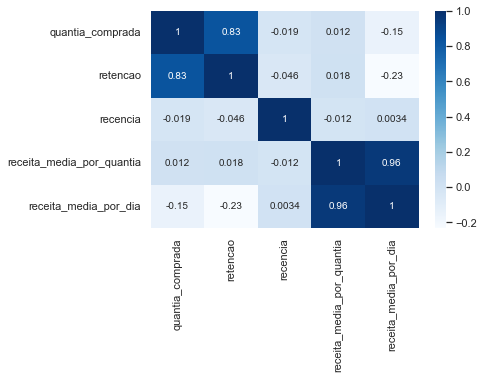

In [36]:
sns.heatmap(X.corr('spearman'), cmap='Blues', annot=True); plt.show()

# Preprocessamento

In [104]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import jarque_bera

#### Mudar etapa abaixo caso mude de receita_media_por_dia para receita_media_por_quantia

In [38]:
X.drop('receita_media_por_dia', axis=1, inplace=True)
X

,quantia_comprada,retencao,recencia,receita_media_por_quantia
0,3,633,1310,45.720
1,2,608,1331,103.755
2,2,582,1253,79.255
3,2,580,1360,93.585
4,2,572,1366,261.560
...,...,...,...,...
95415,1,1,1672,259.960
95416,1,1,1284,98.900
95417,1,1,1324,138.460
95418,1,1,1298,42.530


MinMaxScaler dimensiona todos os recursos de dados no intervalo [0, 1] ou então no intervalo [-1, 1] se houver valores negativos no conjunto de dados. Na presença de outliers, o StandardScaler não garante escalas de recursos balanceadas, devido à influência dos outliers ao calcular a média empírica e o desvio padrão. Isso leva à redução na faixa dos valores do recurso. 

https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/

In [39]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = X.columns
scaled_data.sort_values('receita_media_por_quantia', ascending=False)

,quantia_comprada,retencao,recencia,receita_media_por_quantia
64678,0.0,0.0,0.464286,1.000000
64635,0.0,0.0,0.067308,0.532081
29905,0.0,0.0,0.778846,0.506772
90633,0.0,0.0,0.053571,0.506253
33952,0.0,0.0,0.640110,0.491931
...,...,...,...,...
57751,0.0,0.0,0.423077,0.000149
80715,0.0,0.0,0.501374,0.000149
9311,0.0,0.0,0.100275,0.000095
40985,0.0,0.0,0.486264,0.000035


### Explicação do Kmeans:
k-means é um método de segregar em torno de centros (centroides) diversos dados, criando o que analogamente na química chamamos de clustering que gera o efeito de particionar n observações dentre k grupos onde cada observação pertence ao grupo mais próximo da média.
https://pt.wikipedia.org/wiki/K-means

In [40]:
palette = ['#e41a1c', '#377eb8', '#4daf4a']

In [41]:
km = KMeans(n_clusters=3, random_state=0).fit(scaled_data)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([36252, 22603, 36565]))

In [42]:
clustered = pd.concat([Cliente['cliente'], scaled_data, pd.Series(km.predict(scaled_data))], axis=1, ignore_index=True)
cols = ['cliente', 'quantia_comprada', 'retencao', 'recencia', 'receita_media_por_quantia', 'grupo']
clustered.columns = cols

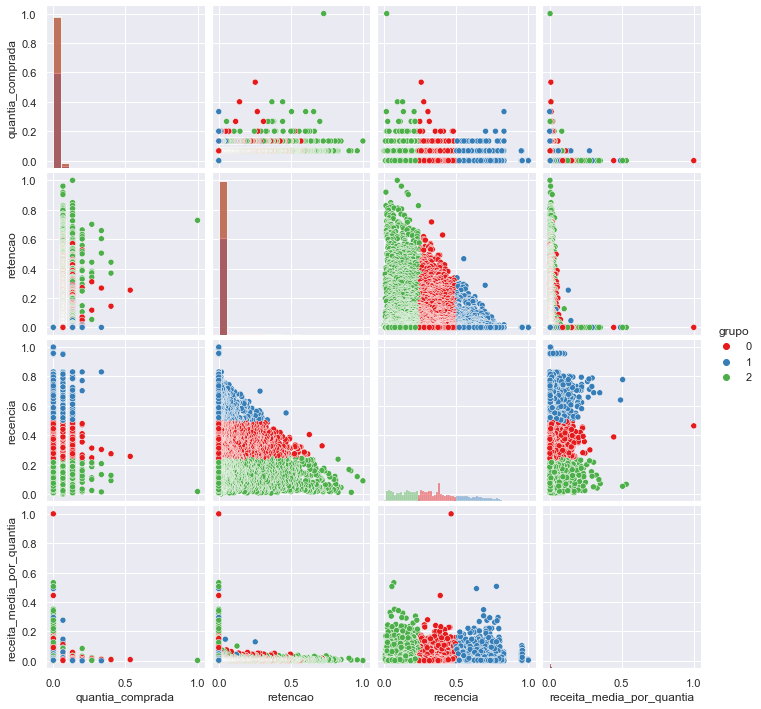

In [43]:
sns.pairplot(clustered, hue='grupo', diag_kind="hist", palette=palette)
plt.show()

In [44]:
clustered.sort_values(['retencao', 'receita_media_por_quantia'], ascending=False).head(10).style.background_gradient(subset=['receita_media_por_quantia', 'recencia', 'retencao'], cmap='Blues')

,cliente,quantia_comprada,retencao,recencia,receita_media_por_quantia,grupo
0,32ea3bdedab835c3aa6cb68ce66565ef,0.133333,1.000000,0.090659,0.002646,2
1,ccafc1c3f270410521c3c6f3b249870f,0.066667,0.960443,0.119505,0.006896,2
2,d8f3c4f441a9b59a29f977df16724f38,0.066667,0.919304,0.012363,0.005102,2
3,94e5ea5a8c1bf546db2739673060c43f,0.066667,0.916139,0.159341,0.006151,2
4,87b3f231705783eb2217e25851c0a45d,0.066667,0.903481,0.167582,0.018453,2
5,8f6ce2295bdbec03cd50e34b4bd7ba0a,0.133333,0.848101,0.045330,0.009185,2
6,30b782a79466007756f170cb5bd6bbd8,0.133333,0.829114,0.046703,0.004638,2
7,4e23e1826902ec9f208e8cc61329b494,0.066667,0.827532,0.237637,0.006173,2
8,a1c61f8566347ec44ea37d22854634a1,0.066667,0.827532,0.012363,0.004588,2
9,a262442e3ab89611b44877c7aaf77468,0.066667,0.822785,0.054945,0.005809,2


In [45]:
clustered.sort_values(['receita_media_por_quantia'], ascending=False).head(10).style.background_gradient(subset=['receita_media_por_quantia', 'recencia', 'retencao'], cmap='Blues')

,cliente,quantia_comprada,retencao,recencia,receita_media_por_quantia,grupo
64678,0a0a92112bd4c708ca5fde585afaa872,0.000000,0.000000,0.464286,1.000000,0
64635,763c8b1c9c68a0229c42c9fc6f662b93,0.000000,0.000000,0.067308,0.532081,2
29905,dc4802a71eae9be1dd28f5d788ceb526,0.000000,0.000000,0.778846,0.506772,1
90633,459bef486812aa25204be022145caa62,0.000000,0.000000,0.053571,0.506253,2
33952,ff4159b92c40ebe40454e3e6a7c35ed6,0.000000,0.000000,0.640110,0.491931,1
64666,4007669dec559734d6f53e029e360987,0.000000,0.000000,0.388736,0.444685,0
63175,5d0a2980b292d049061542014e8960bf,0.000000,0.000000,0.071429,0.351522,2
35510,eebb5dda148d3893cdaf5b5ca3040ccb,0.000000,0.000000,0.689560,0.348219,1
89743,48e1ac109decbb87765a3eade6854098,0.000000,0.000000,0.098901,0.342172,2
27992,edde2314c6c30e864a128ac95d6b2112,0.000000,0.000000,0.041209,0.329835,2


### MinMax + PCA com 2 + Kmeans

EXPLICAÇÃO DO PCA AQUI!!!

In [46]:
pca2 = PCA(n_components=2, random_state=0)
pca2 = pca2.fit_transform(scaled_data)

p2 = pd.DataFrame(pca2)

km2 = KMeans(n_clusters=3, random_state=0).fit(p2)
np.unique(km2.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([36122, 36815, 22483]))

In [47]:
print(np.unique(km.labels_, return_counts=True),
np.unique(km2.labels_, return_counts=True), sep='\n')

(array([0, 1, 2], dtype=int32), array([36252, 22603, 36565]))
(array([0, 1, 2], dtype=int32), array([36122, 36815, 22483]))


In [48]:
clustered2 = pd.concat([Cliente['cliente'], p2, pd.Series(km2.predict(p2))], axis=1, ignore_index=True)
cols = ['cliente', 'var_1', 'var_2', 'grupo']
clustered2.columns = cols

<AxesSubplot:xlabel='var_1', ylabel='var_2'>

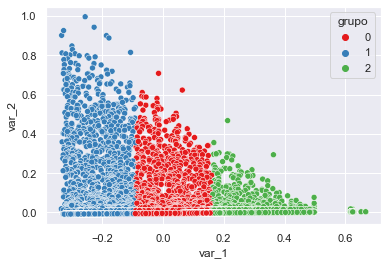

In [49]:
sns.scatterplot(x='var_1', y='var_2', hue='grupo', data=clustered2, palette=palette)
plt.show()

In [50]:
clustered2.sort_values(['var_2', 'var_1'], ascending=False).head(10).style.background_gradient(subset=['var_2', 'var_1'], cmap='Blues')

,cliente,var_1,var_2,grupo
0,32ea3bdedab835c3aa6cb68ce66565ef,-0.255212,0.996643,1
1,ccafc1c3f270410521c3c6f3b249870f,-0.225775,0.943404,1
28,8d50f5eadf50201ccdcedfb9e2ac8455,-0.326043,0.926226,1
2,d8f3c4f441a9b59a29f977df16724f38,-0.332403,0.902013,1
3,94e5ea5a8c1bf546db2739673060c43f,-0.185397,0.900742,1
4,87b3f231705783eb2217e25851c0a45d,-0.177000,0.888466,1
5,8f6ce2295bdbec03cd50e34b4bd7ba0a,-0.298668,0.848091,1
6,30b782a79466007756f170cb5bd6bbd8,-0.297061,0.829630,1
7,4e23e1826902ec9f208e8cc61329b494,-0.106016,0.815395,1
8,a1c61f8566347ec44ea37d22854634a1,-0.331274,0.812619,1


In [51]:
clustered2.sort_values(['var_1'], ascending=False).head(10).style.background_gradient(subset=['var_1', 'var_2'], cmap='Blues')

,cliente,var_1,var_2,grupo
69966,b7d76e111c89f7ebf14761390f0f7d17,0.666579,0.003642,2
89703,4854e9b3feff728c13ee5fc7d1547e92,0.666579,0.003659,2
66031,830d5b7aaa3b6f1e9ad63703bec97d23,0.651470,0.003453,2
53745,0eb1ee9dba87f5b36b4613a65074337c,0.628120,0.003174,2
3323,9f302d00dd3e18ed3745778184b4f0fe,0.626747,0.003121,2
92159,4be873e3bf0455763882101d7eccc78c,0.626747,0.003128,2
80851,6e4c8eed6842146f77d917f7b437b4c2,0.626747,0.003138,2
18475,7390ed59fa1febbfda31a80b4318c8cb,0.626747,0.003145,2
21331,8d3a54507421dbd2ce0a1d58046826e0,0.626747,0.003150,2
25379,88bc832f104b6dd684a17dbb1b76e778,0.626747,0.003156,2


Dedução do comportamento dos dados:
-> variáveis que caminham em direção oposta como: recencia e receita; gerando assim uma aparência de tradeoff nas variáveis

In [52]:
clustered2[['var_1', 'var_2']].corr().style.format({'var_1':'{:,.4f}', 'var_2':'{:,.4f}'})

,var_1,var_2
var_1,1.0000,0.0000
var_2,0.0000,1.0000


### PCA com 3

In [53]:
pca3 = PCA(n_components=3, random_state=0)
pca3 = pca3.fit_transform(scaled_data)

p3 = pd.DataFrame(pca3)

km3 = KMeans(n_clusters=3, random_state=0).fit(p3)
np.unique(km3.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([36124, 36813, 22483]))

In [54]:
clustered3 = pd.concat([Cliente['cliente'], p3, pd.Series(km3.predict(p3))], axis=1, ignore_index=True)
cols = ['cliente', 'var_1', 'var_2', 'var_3', 'grupo']
clustered3.columns = cols

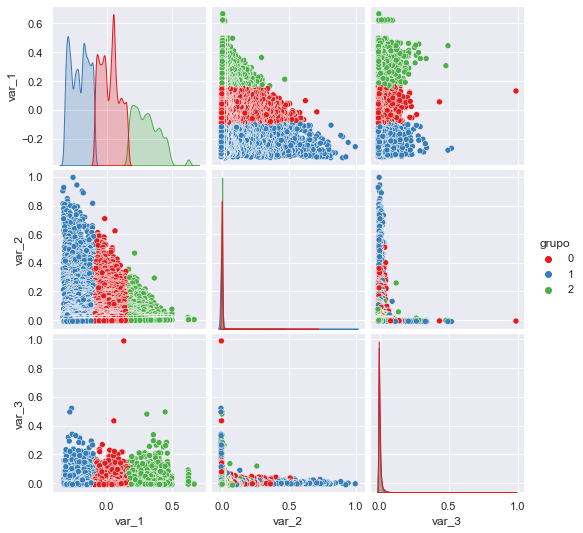

In [55]:
sns.pairplot(clustered3, hue='grupo', palette=palette); plt.show()

#### ELBOW 1 (scaled_data), ELBOW 2 (pca com 2), ELBOW3 (pca com 3)
colocar os elbows juntos lado a lado para comparar o que melhor agrupa tudo com o kmeans de 3

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.
https://en.wikipedia.org/wiki/Elbow_method_(clustering)

Diferenças Marginalmente irrelevantes perante as conclusões do método Elbow

In [56]:
i = tuple(range(2,14))
k_elbow1 = [KMeans(n_clusters=clust, random_state=0).fit(scaled_data).inertia_ for clust in i]
k_elbow2 = [KMeans(n_clusters=clust, random_state=0).fit(p2).inertia_ for clust in i]
k_elbow3 = [KMeans(n_clusters=clust, random_state=0).fit(p3).inertia_ for clust in i]

#### Ausência de diferença entre resultados a partir da metrica de Elbow

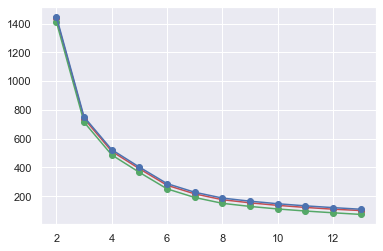

In [57]:
plt.plot(i, k_elbow3, 'o-r')
plt.plot(i, k_elbow2, 'o-g')
plt.plot(i, k_elbow1, 'o-b')
plt.show()

# Usando modelo AGGLOMERATIVE CLUSTERING

**Metric** used to compute the linkage. Can be "euclidean", "l1", "l2",
"manhattan", "cosine", or "precomputed".
If linkage is "ward", only "euclidean" is accepted.
If "precomputed", a distance matrix (instead of a similarity matrix)
is needed as input for the fit method.

----

**Linkage** : {'ward', 'complete', 'average', 'single'}, default='ward'
    Which linkage criterion to use. The linkage criterion determines which
distance to use between sets of observation. The algorithm will merge
the pairs of cluster that minimize this criterion.

'ward' minimizes the variance of the clusters being merged.

'average' uses the average of the distances of each observation of
the two sets.

'complete' or 'maximum' linkage uses the maximum distances between
all observations of the two sets.

'single' uses the minimum of the distances between all observations
of the two sets.

In [109]:
np.random.seed(0)
sample = scaled_data.sample(20000)

In [110]:
scaled_data

,quantia_comprada,retencao,recencia,receita_media_por_quantia
0,0.133333,1.000000,0.090659,0.002646
1,0.066667,0.960443,0.119505,0.006896
2,0.066667,0.919304,0.012363,0.005102
3,0.066667,0.916139,0.159341,0.006151
4,0.066667,0.903481,0.167582,0.018453
...,...,...,...,...
95415,0.000000,0.000000,0.587912,0.018336
95416,0.000000,0.000000,0.054945,0.006541
95417,0.000000,0.000000,0.109890,0.009438
95418,0.000000,0.000000,0.074176,0.002412


In [102]:
def model_agg(X, lk, metric='euclidean'):
    global sample
    scalador = MinMaxScaler()
    agg1 = AgglomerativeClustering(n_clusters=3, linkage=lk, affinity=metric)
    scal2 = scalador.fit_transform(sample)
    result = agg1.fit(scal2)
    return scal2, result

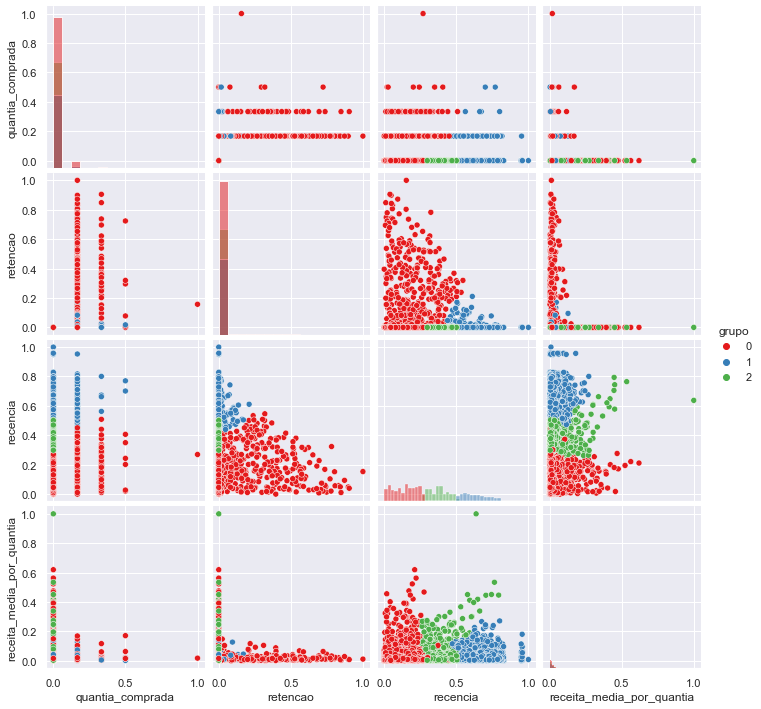

CPU times: user 40.5 s, sys: 5.13 s, total: 45.6 s
Wall time: 46.9 s


In [59]:
%%time
data, result = model_agg(X, 'ward')
data = pd.DataFrame(data)
result = pd.Series(result.labels_)
final = pd.concat([data, result], axis=1)
final.columns = list(X.columns) + ['grupo']
sns.pairplot(final, hue='grupo', diag_kind='hist', palette=palette)
plt.show()

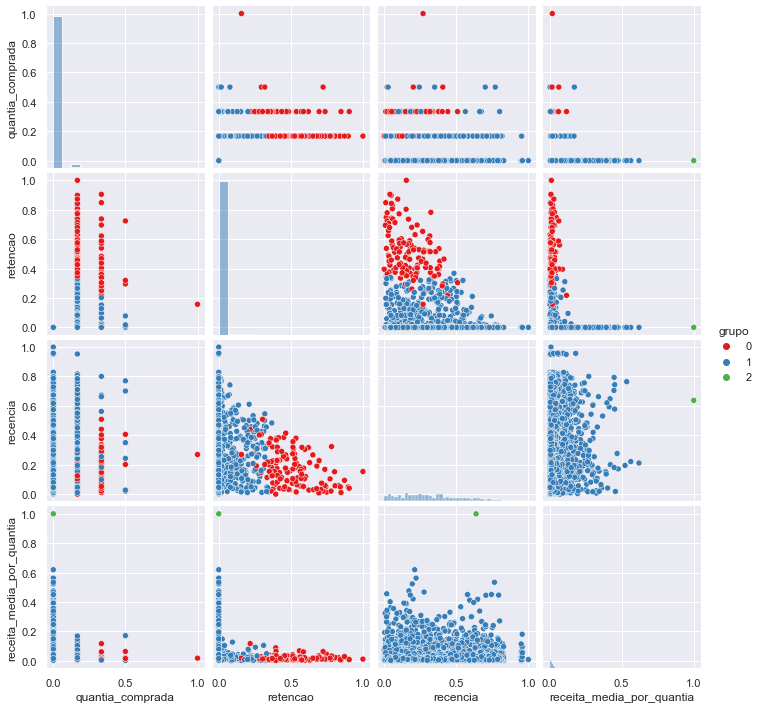

CPU times: user 45.8 s, sys: 1.48 s, total: 47.3 s
Wall time: 48.8 s


In [60]:
%%time
data, result = model_agg(X, 'complete', metric='euclidean')
data = pd.DataFrame(data)
result = pd.Series(result.labels_)
final2 = pd.concat([data, result], axis=1)
final2.columns = list(X.columns) + ['grupo']
sns.pairplot(final2, hue='grupo', diag_kind='hist', palette=palette)
plt.show()

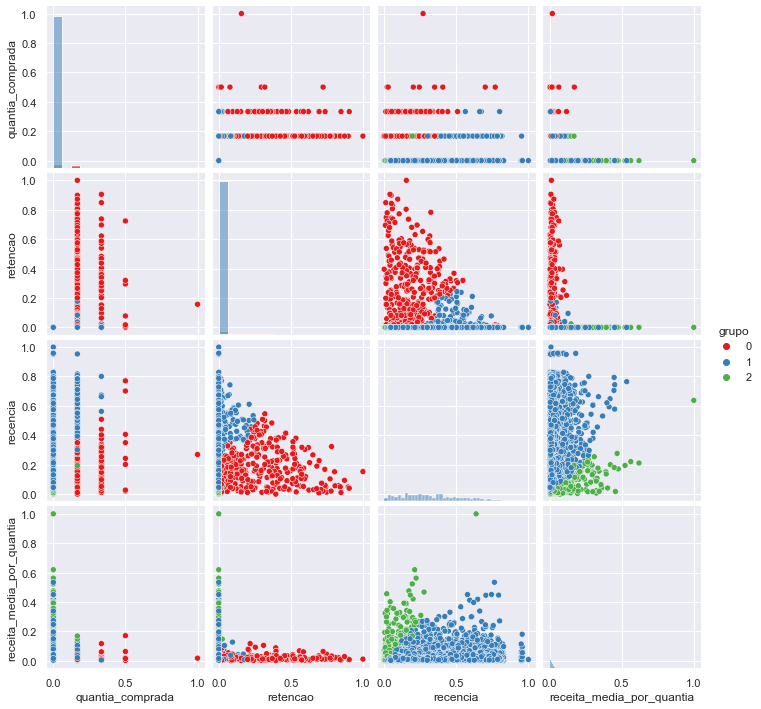

CPU times: user 41.4 s, sys: 7.92 s, total: 49.3 s
Wall time: 59.4 s


In [105]:
%%time

data, result = model_agg(X, 'complete', metric='cosine')
data = pd.DataFrame(data)
result = pd.Series(result.labels_)
final3 = pd.concat([data, result], axis=1)
final3.columns = list(X.columns) + ['grupo']
sns.pairplot(final3, hue='grupo', diag_kind='hist', palette=palette)
plt.show()

### SILHOUTE SCORE

In [106]:
%%time
display(silhouette_score(scaled_data, clustered['grupo']),
silhouette_score(pca2, clustered2['grupo']),
silhouette_score(pca3, clustered3['grupo']),
silhouette_score(final, final['grupo']),
silhouette_score(final2, final2['grupo']),
silhouette_score(final3, final3['grupo']))

0.5473408550491811

0.5609846213212926

0.5501074192594178

0.8969367944555579

0.7899985494358586

0.7750964496956508

CPU times: user 8min 23s, sys: 4min 11s, total: 12min 35s
Wall time: 8min 44s


### IMPORTANCE OF FEATURES:

RandomForestClassifier(n_jobs=-1, random_state=0)

<AxesSubplot:>

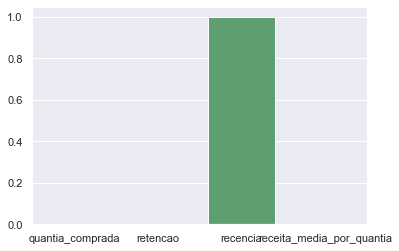

RandomForestClassifier(n_jobs=-1, random_state=0)

<AxesSubplot:>

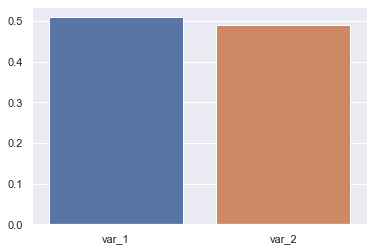

RandomForestClassifier(n_jobs=-1, random_state=0)

<AxesSubplot:>

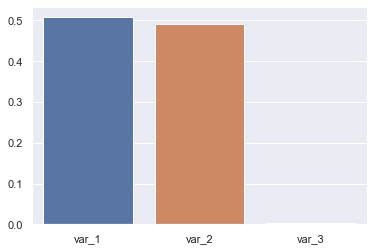

RandomForestClassifier(n_jobs=-1, random_state=0)

<AxesSubplot:>

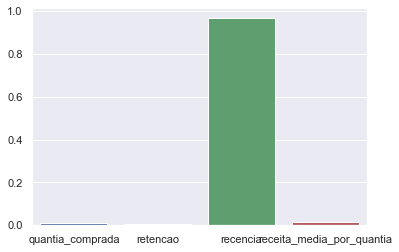

RandomForestClassifier(n_jobs=-1, random_state=0)

<AxesSubplot:>

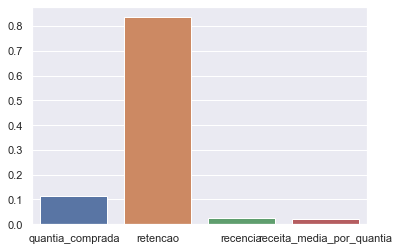

RandomForestClassifier(n_jobs=-1, random_state=0)

<AxesSubplot:>

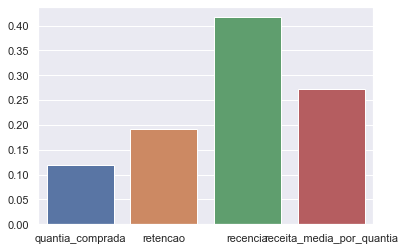

In [100]:
for each_model in [clustered.iloc[:, 1:], clustered2.iloc[:, 1:], clustered3.iloc[:, 1:], final, final2, final3]:
    rfr = RandomForestClassifier(n_jobs=-1, random_state=0)
    rfr.fit(each_model.drop(columns='grupo'), each_model['grupo'])
    sns.barplot(x=rfr.feature_names_in_, y=rfr.feature_importances_.round(3))
    plt.show()

In [99]:
clustered2

,cliente,var_1,var_2,grupo
0,32ea3bdedab835c3aa6cb68ce66565ef,-0.255212,0.996643,1
1,ccafc1c3f270410521c3c6f3b249870f,-0.225775,0.943404,1
2,d8f3c4f441a9b59a29f977df16724f38,-0.332403,0.902013,1
3,94e5ea5a8c1bf546db2739673060c43f,-0.185397,0.900742,1
4,87b3f231705783eb2217e25851c0a45d,-0.177000,0.888466,1
...,...,...,...,...
95415,42c8ccbe558d063718d19cff01505af9,0.254523,-0.001482,2
95416,42c837a3d7df8cfa87de63fbc1aade2f,-0.278403,-0.008019,1
95417,42c7e57c48d38fc34ed69508a092abcd,-0.223463,-0.007352,1
95418,42f3aebe1309a0f58863f1ec28898969,-0.259174,-0.007766,1
